<a href="https://colab.research.google.com/github/Maxmoffty/datascience/blob/main/gold_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
from google .colab import files
files.upload()

Saving gld_price_data.csv to gld_price_data (1).csv


{'gld_price_data (1).csv': b'Date,SPX,GLD,USO,SLV,EUR/USD\r\n1/2/2008,1447.160034,84.860001,78.470001,15.18,1.471692\r\n1/3/2008,1447.160034,85.57,78.370003,15.285,1.474491\r\n1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492\r\n1/7/2008,1416.180054,84.769997,75.5,15.053,1.468299\r\n1/8/2008,1390.189941,86.779999,76.059998,15.59,1.557099\r\n1/9/2008,1409.130005,86.550003,75.25,15.52,1.466405\r\n1/10/2008,1420.329956,88.25,74.019997,16.061001,1.4801\r\n1/11/2008,1401.02002,88.580002,73.089996,16.077,1.479006\r\n1/14/2008,1416.25,89.540001,74.25,16.280001,1.4869\r\n1/15/2008,1380.949951,87.989998,72.779999,15.834,1.48021\r\n1/16/2008,1373.199951,86.699997,71.849998,15.654,1.466405\r\n1/17/2008,1333.25,86.5,71.029999,15.717,1.464\r\n1/18/2008,1325.189941,87.419998,71.540001,16.030001,1.461796\r\n1/22/2008,1310.5,88.169998,70.550003,15.902,1.464794\r\n1/23/2008,1338.599976,87.889999,69.5,15.9,1.463208\r\n1/24/2008,1352.069946,90.080002,70.93,16.299999,1.47741\r\n1/25/2008,1330.60998

In [ ]:
gold_data=pd.read_csv('gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data=gold_data.drop(["Date"],axis=1)

In [ ]:
gold_data.shape

(2290, 5)

In [ ]:
gold_data.isnull().sum()

,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlection 1 positive correlection 2 negative correlection

In [ ]:
correlation=gold_data.corr()

<Axes: >

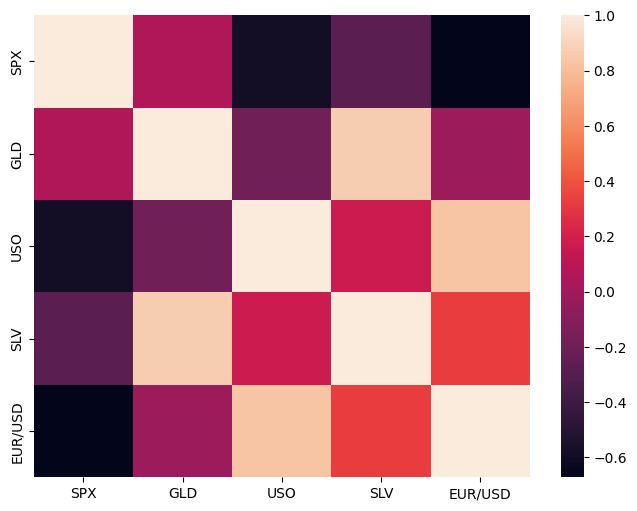

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(gold_data.corr())

In [ ]:
#correlection of gold values
#correlection=gold_data.corr()

<Figure size 2400x600 with 0 Axes>

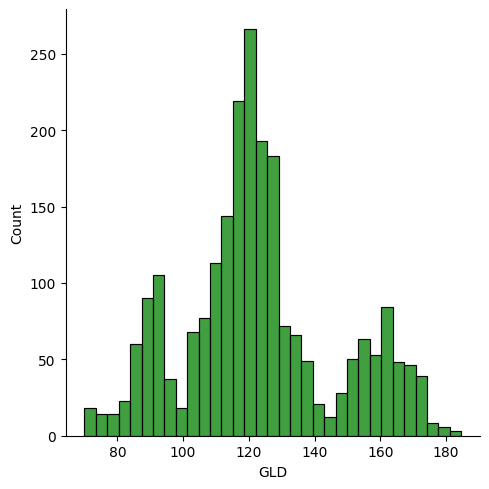

In [ ]:
#checking the distribution of gold value
plt.figure(figsize=(24,6))
sns.displot(gold_data['GLD'],color='green')

splitting the feature and target

In [ ]:
x=gold_data.drop(['EUR/USD'],axis=1)
y=gold_data["EUR/USD"]

In [ ]:
print(x)

              SPX         GLD        USO      SLV
0     1447.160034   84.860001  78.470001  15.1800
1     1447.160034   85.570000  78.370003  15.2850
2     1411.630005   85.129997  77.309998  15.1670
3     1416.180054   84.769997  75.500000  15.0530
4     1390.189941   86.779999  76.059998  15.5900
...           ...         ...        ...      ...
2285  2671.919922  124.589996  14.060000  15.5100
2286  2697.790039  124.330002  14.370000  15.5300
2287  2723.070068  125.180000  14.410000  15.7400
2288  2730.129883  124.489998  14.380000  15.5600
2289  2725.780029  122.543800  14.405800  15.4542

[2290 rows x 4 columns]


In [ ]:
print(y)

0       1.471692
1       1.474491
2       1.475492
3       1.468299
4       1.557099
          ...   
2285    1.186789
2286    1.184722
2287    1.191753
2288    1.193118
2289    1.182033
Name: EUR/USD, Length: 2290, dtype: float64


In [ ]:
gold_data.value_counts('EUR/USD')

,count
EUR/USD,
1.437298,4
1.319087,3
1.293828,3
1.088898,3
1.285843,3
...,...
1.232590,1
1.232499,1
1.232240,1


spitting into trainng data and testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [ ]:
print(x_train)

              SPX         GLD        USO        SLV
476   1138.500000  109.879997  39.790001  16.889999
1958  2202.939941  115.540001  10.630000  15.800000
248    700.820007   90.930000  24.480000  12.770000
2231  2656.000000  125.370003  11.890000  15.570000
1325  1838.880005  119.889999  33.040001  19.420000
...           ...         ...        ...        ...
1071  1409.150024  169.610001  32.320000  32.980000
433   1132.989990  109.800003  40.270000  17.230000
674   1286.119995  129.869995  38.610001  27.389999
1099  1461.890015  159.429993  33.919998  29.180000
1608  2092.429932  115.139999  18.500000  15.600000

[1832 rows x 4 columns]


modeling training random forest regression

In [ ]:
regression=RandomForestRegressor(n_estimators=100)

In [ ]:
#traing the models
regression.fit(x_train,y_train)

RandomForestRegressor()

model evaluation

In [ ]:
#prediction on test data
test_data_prediction=regression.predict(x_test)

In [ ]:
print(test_data_prediction)

[1.31858279 1.46988704 1.1092788  1.12567379 1.06630131 1.2211288
 1.43364223 1.19345774 1.26936414 1.34891795 1.24921842 1.42081424
 1.31187263 1.31362811 1.12463755 1.09571872 1.35846944 1.2914651
 1.31358569 1.37807392 1.29085184 1.32086512 1.41379067 1.42687735
 1.20919418 1.42575866 1.40443145 1.36401258 1.27324383 1.27720485
 1.32047831 1.22383038 1.58489394 1.110618   1.23503212 1.32359164
 1.1212312  1.13079923 1.33188386 1.10150383 1.37825935 1.55735896
 1.23361959 1.44040818 1.28688395 1.3604966  1.12162105 1.11880999
 1.57505667 1.34845478 1.2560974  1.14605586 1.10499007 1.11769346
 1.16041954 1.3260307  1.34109694 1.41955251 1.45507    1.54076831
 1.5360612  1.54816156 1.30092948 1.17902678 1.23375173 1.36922115
 1.33409248 1.18272006 1.26307718 1.46253073 1.33941668 1.43557351
 1.37677102 1.2525734  1.32837437 1.36059699 1.09185732 1.13175887
 1.09111025 1.11339743 1.06509527 1.41050307 1.36483822 1.05710827
 1.53730889 1.55456937 1.43783238 1.37455339 1.06090617 1.460421

In [ ]:
#squard error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R square error:",error_score)

R square error: 0.9821569015413578


In [ ]:
y_test=list(y_test)

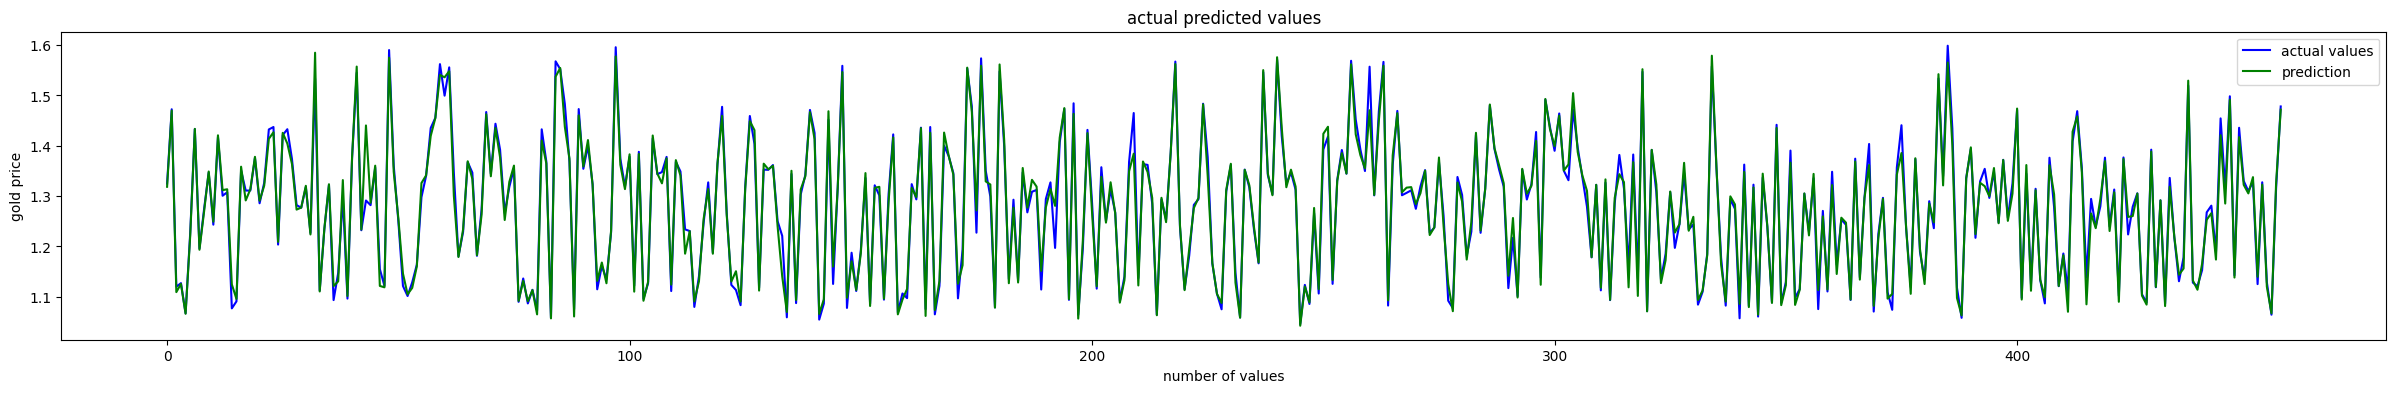

In [ ]:
plt.figure(figsize=(30,4))
plt.plot(y_test,color='blue',label='actual values')
plt.plot(test_data_prediction,color='green',label='prediction')
plt.title('actual predicted values')
plt.xlabel('number of values')
plt.ylabel('gold price')
plt.legend()
plt.show()

In [ ]:
input_data=(1293.369995,96.089996,83.730003,20.040001)
input_data_as_numpy_array=np.array(input_data)
reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regression.predict(reshaped)
print('gold price:',prediction[0])

gold price: 1.5422562400000006


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
